In [ ]:
# Author: Alexander Gebreamlak
# Date: November 13, 2024

In [38]:
import pandas as pd
import os
pwd = os.getcwd()
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import json
import requests
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [22]:
#Q1 Manually created this dataset using Census data from 2021 - https://www12.statcan.gc.ca/census-recensement/index-eng.cfm
# COVID-19 Case data by Public Health Unit is collected until June 4th 2024 - https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350
# COVID-19 Death data by Public Health Unit is collected until October 27th 2024 - https://www.publichealthontario.ca/en/Data-and-Analysis/Infectious-Disease/Respiratory-Virus-Tool
df = pd.read_excel(pwd + "/data/PHU_Data.xlsx")
df


,PHU_unit,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force
0,Algoma,2226,112764,0.508,14202,128,29900,2.2,48040,876,0.034,49840
1,Brant,2227,144937,0.509,16083,171,27955,2.5,50040,1198,0.127,73555
2,Chatham-Kent,2224,104316,0.508,12246,159,24600,2.3,46640,894,0.064,49015
3,Durham,2230,696992,0.512,78487,625,111080,2.8,56750,1506,0.361,367505
4,Eastern Ontario,2258,210276,0.506,22714,340,46960,2.4,50480,978,0.052,104310
5,Grey-Bruce,2233,174301,0.506,13525,163,45735,2.3,55050,1047,0.040,82790
6,Haldimand-Norfolk,2234,116706,0.504,12357,150,27565,2.5,49480,1066,0.041,56295
7,Hamilton,2237,569353,0.509,79516,750,104290,2.5,53750,1233,0.248,290990
8,Halton,2236,596637,0.513,61686,520,95490,2.8,71600,1904,0.351,320175
9,Haliburton Kawartha Pr,2235,189183,0.505,14946,213,55620,2.3,51160,1157,0.037,86520


In [23]:
#Q2 Mapping housing, socio-economic, and demographic factors from dataset above to previous dataset created
df_A4 = pd.read_excel(pwd + "/data/A4_df.xlsx")
df_A4.head()

Q2_df = pd.merge(df, df_A4, on='PHU_Num', how='right') 

#Dropping duplicate column
Q2_df = Q2_df.drop(["PHU_unit"], axis=1)

Q2_df

,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,LTC_Home,First_Case_Num_Days,First_Death_Num_Days,PRIV_BEDS,SEMI_BEDS,THREE_BEDS,BASIC_BEDS,CONCARE_BED,RES_BED,INT_BED,ACCREDITATION,YEAR_RENO,CON_Y,Total_Beds,PER_FEM_LTCR,PER_LTCR<65,PER_LTCR>85,PER_LTCR_DEMENTIA,PER_LTCR_CHF,PR_ANTIP_MED,PR_PREUL,PR_FELL,PR_PHYS_RES,PR_WRS_DEPR,PR_PAIN,PR_IMPRV_FX,PR_WRS_FX,PR_WRS_PAIN,Funded_CMI_2020_2021,Home_Level_CMI_2020_2021,Ownership_type,SSI_2019,SSI_NC_2019,IPAC_2019,IPAC_NC_2019,OAT_2019,OAT_NC_2019,SSI_2020,SSI_NC_2020,IPAC_2020,IPAC_NC_2020_COVID,IPAC_NC_2020,OAT_2020,OAT_NC_2020_COVID,OAT_NC_2020,CCFI_2019,CCFI_2020,RQI_2019,New_D_Retrofit_Beds,A_Beds,B_Beds,C_Beds,D_Upgrade_Beds,ELDCAP_Beds,APRV_SS_BEDS,LTCH_SIZE,LTC_LOC,Chain_ownership,Design,LHIN,City,Health_unit,Licensee,Management_firm,Had_outbreak,Local_incidence,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2
0,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,"albright gardens homes, incorporated",90,377,167.0000,64.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,19.000000,231.0,65.6,9.7,55.9,75.0,11.0,26.6,2.8,15.4,6.7,38.9,1.9,26.419307,35.014827,10.052303,0.911800,1.101700,Non-Profit,3.0,2,1.0,0,0.0,NI,1.0,0,0.0,NI,NI,0.0,NI,NI,7.0,7.0,0.0,231.0,0.0,0.0,0.0,0.0,0.0,N,Large,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Beamsville,Niagara Region Public Health Department,"Albright Gardens Homes, Incorporated",None,YES,"Medium (1,000 - 2,000 cases per 100,000)",1.0,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4
1,3895,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,seven oaks,90,90,137.0000,112.000000,0.000000,0.000000,17.0,2.0,0.0,1.0,0.0,32.000000,249.0,67.0,12.6,46.0,49.1,10.1,19.7,1.9,14.2,4.1,24.4,2.0,16.600000,27.400000,9.000000,1.041400,1.141500,Municipal,1.0,0,3.0,3,0.0,NI,0.0,NI,0.0,NI,NI,0.0,NI,NI,14.0,2.0,0.0,0.0,0.0,0.0,249.0,0.0,0.0,Y,Large,Urban,Large chain (10+ facilities),Older (>50% 1972 or earlier),Central East,Scarborough,Toronto Public Health,City of Toronto,None,YES,"High (2,000+ cases per 100,000)",41.0,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0
2,2266,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,royal terrace,90,935,61.8663,50.106115,0.000000,14.008993,0.0,0.0,0.0,0.0,0.0,32.000000,67.0,66.0,8.5,52.8,60.0,10.0,23.4,2.0,7.4,9.7,33.2,1.4,23.900000,32.800000,18.200000,1.119700,1.226800,For-Profit,0.0,NI,0.0,NI,0.0,NI,0.0,NI,0.0,NI,NI,0.0,NI,NI,4.0,4.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,N,Medium,Rural,Single home,Newer (>50% post-1972),Waterloo Wellington,Palmerston,Wellington-Dufferin-Guelph Public Health,Shanti Enterprises Limited,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",0.0,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0
3,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,royal rose place,90,90,58.0000,38.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,96.0,63.1,11.9,29.8,46.6,15.1,20.2,2.1,21.2,0.0,21.3,2.8,20.400000,37.400000,8.300000,0.980100,1.080900,For-Profit,0.0,NI,1.0,0,0.0,NI,0.0,NI,1.0,0,0,0.0,NI,NI,5.0,2.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,N,Medium,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Welland,Niagara Region Public Health Department,Jarlette,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",20.0,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0
4,2230,696992.0,0.512,784

In [24]:
#Q3

# Calculate the mean COVID-19 death rate per 100 nursing home residents in Ontario
Mean_C19_Death_rate = (Q2_df['Resident_death'].sum() / Q2_df['Total_Beds'].sum()) * 100

# Add a new column to categorize each facility as 'A' (above) or 'B' (below) the mean COVID-19 death rate per 100 nursing home residents in Ontario
Q2_df['Death_Rate_Category'] = Q2_df.apply(lambda row: 'A' if (row['Resident_deaths_per100beds'] / row['Total_Beds']) * 100 > Mean_C19_Death_rate else 'B', axis=1)

Q3_df = Q2_df

Q3_df.head()

,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,LTC_Home,First_Case_Num_Days,First_Death_Num_Days,PRIV_BEDS,SEMI_BEDS,THREE_BEDS,BASIC_BEDS,CONCARE_BED,RES_BED,INT_BED,ACCREDITATION,YEAR_RENO,CON_Y,Total_Beds,PER_FEM_LTCR,PER_LTCR<65,PER_LTCR>85,PER_LTCR_DEMENTIA,PER_LTCR_CHF,PR_ANTIP_MED,PR_PREUL,PR_FELL,PR_PHYS_RES,PR_WRS_DEPR,PR_PAIN,PR_IMPRV_FX,PR_WRS_FX,PR_WRS_PAIN,Funded_CMI_2020_2021,Home_Level_CMI_2020_2021,Ownership_type,SSI_2019,SSI_NC_2019,IPAC_2019,IPAC_NC_2019,OAT_2019,OAT_NC_2019,SSI_2020,SSI_NC_2020,IPAC_2020,IPAC_NC_2020_COVID,IPAC_NC_2020,OAT_2020,OAT_NC_2020_COVID,OAT_NC_2020,CCFI_2019,CCFI_2020,RQI_2019,New_D_Retrofit_Beds,A_Beds,B_Beds,C_Beds,D_Upgrade_Beds,ELDCAP_Beds,APRV_SS_BEDS,LTCH_SIZE,LTC_LOC,Chain_ownership,Design,LHIN,City,Health_unit,Licensee,Management_firm,Had_outbreak,Local_incidence,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,"albright gardens homes, incorporated",90,377,167.0000,64.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,19.0,231.0,65.6,9.7,55.9,75.0,11.0,26.6,2.8,15.4,6.7,38.9,1.9,26.419307,35.014827,10.052303,0.9118,1.1017,Non-Profit,3.0,2,1.0,0,0.0,NI,1.0,0,0.0,NI,NI,0.0,NI,NI,7.0,7.0,0.0,231.0,0.0,0.0,0.0,0.0,0.0,N,Large,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Beamsville,Niagara Region Public Health Department,"Albright Gardens Homes, Incorporated",None,YES,"Medium (1,000 - 2,000 cases per 100,000)",1.0,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,3895,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,seven oaks,90,90,137.0000,112.000000,0.0,0.000000,17.0,2.0,0.0,1.0,0.0,32.0,249.0,67.0,12.6,46.0,49.1,10.1,19.7,1.9,14.2,4.1,24.4,2.0,16.600000,27.400000,9.000000,1.0414,1.1415,Municipal,1.0,0,3.0,3,0.0,NI,0.0,NI,0.0,NI,NI,0.0,NI,NI,14.0,2.0,0.0,0.0,0.0,0.0,249.0,0.0,0.0,Y,Large,Urban,Large chain (10+ facilities),Older (>50% 1972 or earlier),Central East,Scarborough,Toronto Public Health,City of Toronto,None,YES,"High (2,000+ cases per 100,000)",41.0,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,2266,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,royal terrace,90,935,61.8663,50.106115,0.0,14.008993,0.0,0.0,0.0,0.0,0.0,32.0,67.0,66.0,8.5,52.8,60.0,10.0,23.4,2.0,7.4,9.7,33.2,1.4,23.900000,32.800000,18.200000,1.1197,1.2268,For-Profit,0.0,NI,0.0,NI,0.0,NI,0.0,NI,0.0,NI,NI,0.0,NI,NI,4.0,4.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,N,Medium,Rural,Single home,Newer (>50% post-1972),Waterloo Wellington,Palmerston,Wellington-Dufferin-Guelph Public Health,Shanti Enterprises Limited,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",0.0,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,royal rose place,90,90,58.0000,38.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,5.0,96.0,63.1,11.9,29.8,46.6,15.1,20.2,2.1,21.2,0.0,21.3,2.8,20.400000,37.400000,8.300000,0.9801,1.0809,For-Profit,0.0,NI,1.0,0,0.0,NI,0.0,NI,1.0,0,0,0.0,NI,NI,5.0,2.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,N,Medium,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Welland,Niagara Region Public Health Department,Jarlette,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",20.0,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0,A
4,2230,696992.0,0.512,78487.0,625.0,111080.0,2.8,5675

In [25]:
pd.set_option('display.max_columns', None)
Q3_df

,PHU_Num,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,LTC_Home,First_Case_Num_Days,First_Death_Num_Days,PRIV_BEDS,SEMI_BEDS,THREE_BEDS,BASIC_BEDS,CONCARE_BED,RES_BED,INT_BED,ACCREDITATION,YEAR_RENO,CON_Y,Total_Beds,PER_FEM_LTCR,PER_LTCR<65,PER_LTCR>85,PER_LTCR_DEMENTIA,PER_LTCR_CHF,PR_ANTIP_MED,PR_PREUL,PR_FELL,PR_PHYS_RES,PR_WRS_DEPR,PR_PAIN,PR_IMPRV_FX,PR_WRS_FX,PR_WRS_PAIN,Funded_CMI_2020_2021,Home_Level_CMI_2020_2021,Ownership_type,SSI_2019,SSI_NC_2019,IPAC_2019,IPAC_NC_2019,OAT_2019,OAT_NC_2019,SSI_2020,SSI_NC_2020,IPAC_2020,IPAC_NC_2020_COVID,IPAC_NC_2020,OAT_2020,OAT_NC_2020_COVID,OAT_NC_2020,CCFI_2019,CCFI_2020,RQI_2019,New_D_Retrofit_Beds,A_Beds,B_Beds,C_Beds,D_Upgrade_Beds,ELDCAP_Beds,APRV_SS_BEDS,LTCH_SIZE,LTC_LOC,Chain_ownership,Design,LHIN,City,Health_unit,Licensee,Management_firm,Had_outbreak,Local_incidence,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,"albright gardens homes, incorporated",90,377,167.0000,64.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,19.000000,231.0,65.6,9.7,55.9,75.0,11.0,26.6,2.8,15.4,6.7,38.9,1.9,26.419307,35.014827,10.052303,0.911800,1.101700,Non-Profit,3.0,2,1.0,0,0.0,NI,1.0,0,0.0,NI,NI,0.0,NI,NI,7.0,7.0,0.0,231.0,0.0,0.0,0.0,0.0,0.0,N,Large,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Beamsville,Niagara Region Public Health Department,"Albright Gardens Homes, Incorporated",None,YES,"Medium (1,000 - 2,000 cases per 100,000)",1.0,0.4,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,1.0,0.4,B
1,3895,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,seven oaks,90,90,137.0000,112.000000,0.000000,0.000000,17.0,2.0,0.0,1.0,0.0,32.000000,249.0,67.0,12.6,46.0,49.1,10.1,19.7,1.9,14.2,4.1,24.4,2.0,16.600000,27.400000,9.000000,1.041400,1.141500,Municipal,1.0,0,3.0,3,0.0,NI,0.0,NI,0.0,NI,NI,0.0,NI,NI,14.0,2.0,0.0,0.0,0.0,0.0,249.0,0.0,0.0,Y,Large,Urban,Large chain (10+ facilities),Older (>50% 1972 or earlier),Central East,Scarborough,Toronto Public Health,City of Toronto,None,YES,"High (2,000+ cases per 100,000)",41.0,16.5,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",41.0,16.5,YES,High local incidence,0.0,0.0,A
2,2266,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,royal terrace,90,935,61.8663,50.106115,0.000000,14.008993,0.0,0.0,0.0,0.0,0.0,32.000000,67.0,66.0,8.5,52.8,60.0,10.0,23.4,2.0,7.4,9.7,33.2,1.4,23.900000,32.800000,18.200000,1.119700,1.226800,For-Profit,0.0,NI,0.0,NI,0.0,NI,0.0,NI,0.0,NI,NI,0.0,NI,NI,4.0,4.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,N,Medium,Rural,Single home,Newer (>50% post-1972),Waterloo Wellington,Palmerston,Wellington-Dufferin-Guelph Public Health,Shanti Enterprises Limited,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",0.0,0.0,YES,"Medium (150-299 cases per 100,000 before Sept....",0.0,0.0,YES,Medium local incidence,0.0,0.0,B
3,2246,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,royal rose place,90,90,58.0000,38.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,96.0,63.1,11.9,29.8,46.6,15.1,20.2,2.1,21.2,0.0,21.3,2.8,20.400000,37.400000,8.300000,0.980100,1.080900,For-Profit,0.0,NI,1.0,0,0.0,NI,0.0,NI,1.0,0,0,0.0,NI,NI,5.0,2.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,N,Medium,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Welland,Niagara Region Public Health Department,Jarlette,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",20.0,20.8,YES,"Medium (150-299 cases per 100,000 before Sept....",20.0,20.8,YES,Medium local incidence,0.0,0.0

In [47]:
#dropping excess columns
Q4_df = Q3_df.drop(columns=['PHU_Num', 'LTC_Home'])

Q4_missing = Q4_df.isna().sum() / len(Q4_df) * 100 
# 2-3% missingness in all columns
print(Q4_missing.to_string())

Population                                      2.091255
Female_Proportion                               2.091255
Total_Covid-19_Cases                            2.091255
Total_Covid-19_Deaths                           2.091255
Population_Over_65                              2.091255
Avg_Household_Size                              2.091255
Per_Capita_Income_Among_Recipients              2.091255
Avg_Gross_Rent_For_Renter_Occupied_Dwellings    2.091255
Visible_Minority_Proportion                     2.091255
In_Labour_Force                                 2.091255
First_Case_Num_Days                             0.000000
First_Death_Num_Days                            0.000000
PRIV_BEDS                                       3.802281
SEMI_BEDS                                       3.802281
THREE_BEDS                                      3.802281
BASIC_BEDS                                      3.802281
CONCARE_BED                                     3.802281
RES_BED                        

In [48]:
#Dropping 9 columns due to excess missingness > 75%. This decision was made arbitrability and can easily be changed to 25%, 50%, 80%, etc. The only reason I chose 75% is because I did not want to delete ALL the data from the compliance/inspection variables.
Q4_df = Q4_df.drop(columns=['IPAC_2019', 'IPAC_NC_2019', 'OAT_2019', 'OAT_NC_2019', 'SSI_2020', 'SSI_NC_2020', 'OAT_2020', 'OAT_NC_2020_COVID', 'OAT_NC_2020'])


In [49]:
missing_rows = Q4_df[Q4_df['THREE_BEDS'].isna()] #THREE-BEDS is just a way to see missing rows
missing_rows


,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,First_Case_Num_Days,First_Death_Num_Days,PRIV_BEDS,SEMI_BEDS,THREE_BEDS,BASIC_BEDS,CONCARE_BED,RES_BED,INT_BED,ACCREDITATION,YEAR_RENO,CON_Y,Total_Beds,PER_FEM_LTCR,PER_LTCR<65,PER_LTCR>85,PER_LTCR_DEMENTIA,PER_LTCR_CHF,PR_ANTIP_MED,PR_PREUL,PR_FELL,PR_PHYS_RES,PR_WRS_DEPR,PR_PAIN,PR_IMPRV_FX,PR_WRS_FX,PR_WRS_PAIN,Funded_CMI_2020_2021,Home_Level_CMI_2020_2021,Ownership_type,SSI_2019,SSI_NC_2019,IPAC_2020,IPAC_NC_2020_COVID,IPAC_NC_2020,CCFI_2019,CCFI_2020,RQI_2019,New_D_Retrofit_Beds,A_Beds,B_Beds,C_Beds,D_Upgrade_Beds,ELDCAP_Beds,APRV_SS_BEDS,LTCH_SIZE,LTC_LOC,Chain_ownership,Design,LHIN,City,Health_unit,Licensee,Management_firm,Had_outbreak,Local_incidence,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
8,189183.0,0.505,14946.0,213.0,55620.0,2.3,51160.0,1157.0,0.037,86520.0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
40,1017449.0,0.512,99057.0,1282.0,172150.0,2.5,64500.0,1422.0,0.319,549990.0,90,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
103,1017449.0,0.512,99057.0,1282.0,172150.0,2.5,64500.0,1422.0,0.319,549990.0,91,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
109,128154.0,0.507,15481.0,191.0,31455.0,2.3,54550.0,1051.0,0.056,59655.0,93,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
124,1017449.0,0.512,99057.0,1282.0,172150.0,2.5,64500.0,1422.0,0.319,549990.0,96,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
281,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,340,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
293,569353.0,0.509,79516.0,750.0,104290.0,2.5,53750.0,1233.0,0.248,290990.0,347,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
306,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,350,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
313,500563.0,0.510,52760.0,654.0,90625.0,2.4,51400.0,1205.0,0.244,256120.0,354,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [50]:
#20 rows (LTHC's) are void of any data from the previous assignment dataset, therefore they will be deleted as keeping them would result in problems when performing the analysis below.
Q4_df = Q4_df.dropna(subset=['THREE_BEDS'])


In [51]:
Q3_df_non_numerical_columns = Q4_df.select_dtypes(exclude=['number']).columns
Q3_df_non_numerical_columns

Index(['Ownership_type', 'SSI_NC_2019', 'IPAC_NC_2020_COVID', 'IPAC_NC_2020',
       'APRV_SS_BEDS', 'LTCH_SIZE', 'LTC_LOC', 'Chain_ownership', 'Design',
       'LHIN', 'City', 'Health_unit', 'Licensee', 'Management_firm',
       'Had_outbreak', 'Local_incidence', 'Had-outbreak_WAVE1',
       'Local_incidence_WAVE1', 'Had-outbreak_WAVE2', 'Local_incidence_WAVE2',
       'Death_Rate_Category'],
      dtype='object')

In [ ]:
#dropping excess columns
Q4_df = Q3_df.drop(columns=['PHU_Num', 'LTC_Home'])

#data manipulation for compliance/inspection columns & converting to numeric
columns_zero_to_nan = ['SSI_2019', 'IPAC_2019', 'OAT_2019', 'SSI_2020', 'IPAC_2020', 'OAT_2020']

# Convert columns to numeric and replace 0 with NaN
for column in columns_zero_to_nan:
    Q4_df[column] = pd.to_numeric(Q4_df[column], errors='coerce').replace(0, np.nan)

# List of columns to process for "NI" -> NaN
columns_ni_to_nan = [
    'SSI_NC_2019', 'IPAC_NC_2019', 'OAT_NC_2019', 
    'SSI_NC_2020', 'IPAC_NC_2020_COVID', 'IPAC_NC_2020', 
    'OAT_NC_2020_COVID', 'OAT_NC_2020'
]

# Convert columns to numeric and replace "NI" with NaN
for column in columns_ni_to_nan:
    Q4_df[column] = pd.to_numeric(Q4_df[column].replace("NI", np.nan), errors='coerce')

In [30]:
#Converting ordinal categorical variables to Factor

ordinal_mapping_1 = {'Small': 1, 'Medium': 2, 'Large': 3}
Q4_df['LTCH_SIZE_Factor'] = Q4_df.pop('LTCH_SIZE').map(ordinal_mapping_1)

ordinal_mapping_2 = {'Low (<1,000 cases per 100,000)': 1, 'Medium (1,000 - 2,000 cases per 100,000)': 2, 'High (2,000+ cases per 100,000)': 3}
Q4_df['Local_incidence_Factor'] = Q4_df.pop('Local_incidence').map(ordinal_mapping_2)

Q4_df['Had-outbreak_WAVE1_Factor'] = pd.factorize(Q4_df['Had-outbreak_WAVE1'])[0]

ordinal_mapping_3 = {'Low (<150 cases per 100,000 before Sept. 1, 2020)': 1, 'Medium (150-299 cases per 100,000 before Sept. 1, 2020)': 2, 'High (300+ cases per 100,000 before Sept. 1, 2020)': 3}
Q4_df['Local_incidence_WAVE1_Factor'] = Q4_df.pop('Local_incidence_WAVE1').map(ordinal_mapping_3)

ordinal_mapping = {'Low local incidence': 1, 'Medium local incidence': 2, 'High local incidence': 3}
Q4_df['Local_incidence_WAVE2_Factor'] = Q4_df.pop('Local_incidence_WAVE2').map(ordinal_mapping)

In [33]:
Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,First_Case_Num_Days,First_Death_Num_Days,PRIV_BEDS,SEMI_BEDS,THREE_BEDS,BASIC_BEDS,CONCARE_BED,RES_BED,INT_BED,ACCREDITATION,YEAR_RENO,CON_Y,Total_Beds,PER_FEM_LTCR,PER_LTCR<65,PER_LTCR>85,PER_LTCR_DEMENTIA,PER_LTCR_CHF,PR_ANTIP_MED,PR_PREUL,PR_FELL,PR_PHYS_RES,PR_WRS_DEPR,PR_PAIN,PR_IMPRV_FX,PR_WRS_FX,PR_WRS_PAIN,Funded_CMI_2020_2021,Home_Level_CMI_2020_2021,Ownership_type,SSI_2019,SSI_NC_2019,IPAC_2019,IPAC_NC_2019,OAT_2019,OAT_NC_2019,SSI_2020,SSI_NC_2020,IPAC_2020,IPAC_NC_2020_COVID,IPAC_NC_2020,OAT_2020,OAT_NC_2020_COVID,OAT_NC_2020,CCFI_2019,CCFI_2020,RQI_2019,New_D_Retrofit_Beds,A_Beds,B_Beds,C_Beds,D_Upgrade_Beds,ELDCAP_Beds,APRV_SS_BEDS,LTC_LOC,Chain_ownership,Design,LHIN,City,Health_unit,Licensee,Management_firm,Had_outbreak,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category,LTCH_SIZE_Factor,Local_incidence_Factor,Had-outbreak_WAVE1_Factor,Local_incidence_WAVE1_Factor,Local_incidence_WAVE2_Factor,Ownership_type_Factor,APRV_SS_BEDS_Factor
0,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,90,377,167.0000,64.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,19.000000,231.0,65.6,9.7,55.9,75.0,11.0,26.6,2.8,15.4,6.7,38.9,1.9,26.419307,35.014827,10.052303,0.911800,1.101700,Non-Profit,3.0,2.0,1.0,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,0.0,231.0,0.0,0.0,0.0,0.0,0.0,N,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Beamsville,Niagara Region Public Health Department,"Albright Gardens Homes, Incorporated",None,YES,1.0,0.4,YES,0.0,0.0,YES,1.0,0.4,B,3.0,2.0,0,2.0,2.0,0,0
1,2794356.0,0.517,402323.0,5249.0,476985.0,2.4,62050.0,1562.0,0.550,1518420.0,90,90,137.0000,112.000000,0.000000,0.000000,17.0,2.0,0.0,1.0,0.0,32.000000,249.0,67.0,12.6,46.0,49.1,10.1,19.7,1.9,14.2,4.1,24.4,2.0,16.600000,27.400000,9.000000,1.041400,1.141500,Municipal,1.0,0.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,2.0,0.0,0.0,0.0,0.0,249.0,0.0,0.0,Y,Urban,Large chain (10+ facilities),Older (>50% 1972 or earlier),Central East,Scarborough,Toronto Public Health,City of Toronto,None,YES,41.0,16.5,YES,41.0,16.5,YES,0.0,0.0,A,3.0,3.0,0,3.0,3.0,1,1
2,307283.0,0.508,29736.0,251.0,53515.0,2.6,57400.0,1354.0,0.170,169205.0,90,935,61.8663,50.106115,0.000000,14.008993,0.0,0.0,0.0,0.0,0.0,32.000000,67.0,66.0,8.5,52.8,60.0,10.0,23.4,2.0,7.4,9.7,33.2,1.4,23.900000,32.800000,18.200000,1.119700,1.226800,For-Profit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,N,Rural,Single home,Newer (>50% post-1972),Waterloo Wellington,Palmerston,Wellington-Dufferin-Guelph Public Health,Shanti Enterprises Limited,None,YES,0.0,0.0,YES,0.0,0.0,YES,0.0,0.0,B,2.0,2.0,0,2.0,2.0,2,0
3,477941.0,0.513,56138.0,754.0,111345.0,2.4,49360.0,1186.0,0.131,233555.0,90,90,58.0000,38.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,96.0,63.1,11.9,29.8,46.6,15.1,20.2,2.1,21.2,0.0,21.3,2.8,20.400000,37.400000,8.300000,0.980100,1.080900,For-Profit,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,5.0,2.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,N,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Welland,Niagara Region Public Health Department,Jarlette,None,YES,20.0,20.8,YES,20.0,20.8,YES,0.0,0.0,A,2.0,2.0,0,2.0,2.0,2,0
4,696992.0,0.512,78487.0,625.0,111080.0,2.8,56750.0,1506.0,0.361,367505.0,90,95,3.0000,24.000000,3.000000,72.000000,0.0,0.0,0.0,1.0,1.0,48.000000,100.0,55.2,10.4,39.9,69.4,12.5,14.5,1.8,23.8,0.0,8.9,0.0,40.900000,32.200000,5.900000,1.009600,1.066200,For-Profit,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN,NaN,NaN,2.0,3.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,N,Urban,Large chain (10

In [34]:
#Converting nominal categorical variables to Factor

columns_to_factorize = [
    'Ownership_type', 'APRV_SS_BEDS', 'LTC_LOC', 'Chain_ownership',
    'Design', 'LHIN', 'City', 'Health_unit', 'Licensee', 'Management_firm',
    'Had_outbreak', 'Had-outbreak_WAVE2', 'Death_Rate_Category'
]

# Loop through columns and factorize
for col in columns_to_factorize:
    Q4_df[f'{col}_Factor'] = pd.factorize(Q4_df[col])[0]


In [35]:
Q4_df_non_numerical_columns = Q3_df.select_dtypes(exclude=['number']).columns
Q4_df_non_numerical_columns

Index(['LTC_Home', 'Ownership_type', 'SSI_NC_2019', 'IPAC_NC_2019',
       'OAT_NC_2019', 'SSI_NC_2020', 'IPAC_NC_2020_COVID', 'IPAC_NC_2020',
       'OAT_NC_2020_COVID', 'OAT_NC_2020', 'APRV_SS_BEDS', 'LTCH_SIZE',
       'LTC_LOC', 'Chain_ownership', 'Design', 'LHIN', 'City', 'Health_unit',
       'Licensee', 'Management_firm', 'Had_outbreak', 'Local_incidence',
       'Had-outbreak_WAVE1', 'Local_incidence_WAVE1', 'Had-outbreak_WAVE2',
       'Local_incidence_WAVE2', 'Death_Rate_Category'],
      dtype='object')

In [36]:
Q4_missing = Q4_df.isna().sum() / len(Q4_df) * 100 
# 2-3% missingness in all columns
print(Q4_missing.to_string())

Population                                       2.091255
Female_Proportion                                2.091255
Total_Covid-19_Cases                             2.091255
Total_Covid-19_Deaths                            2.091255
Population_Over_65                               2.091255
Avg_Household_Size                               2.091255
Per_Capita_Income_Among_Recipients               2.091255
Avg_Gross_Rent_For_Renter_Occupied_Dwellings     2.091255
Visible_Minority_Proportion                      2.091255
In_Labour_Force                                  2.091255
First_Case_Num_Days                              0.000000
First_Death_Num_Days                             0.000000
PRIV_BEDS                                        3.802281
SEMI_BEDS                                        3.802281
THREE_BEDS                                       3.802281
BASIC_BEDS                                       3.802281
CONCARE_BED                                      3.802281
RES_BED       

In [ ]:
#Dropping 9 columns due to excess missingness > 75%. This decision was made arbitrability and can easily be changed to 25%, 50%, 80%, etc. The only reason I chose 75% is because I did not want to delete ALL the data from the compliance/inspection variables.
Q4_df = Q4_df.drop(columns=['IPAC_2019', 'IPAC_NC_2019', 'OAT_2019', 'OAT_NC_2019', 'SSI_2020', 'SSI_NC_2020', 'OAT_2020', 'OAT_NC_2020_COVID', 'OAT_NC_2020'])


In [88]:
# Select only the continuous columns for centering and standardizing
continuous_cols = Q4_df.select_dtypes(include=['float64', 'int64'])

# Centering and standardizing: subtract the mean and divide by the standard deviation
Q4_df_centered_standardized = (continuous_cols - continuous_cols.mean()) / continuous_cols.std()

# Replace the original numerical columns with the centered and standardized versions
Q4_df[continuous_cols.columns] = Q4_df_centered_standardized

Q4_df

,Population,Female_Proportion,Total_Covid-19_Cases,Total_Covid-19_Deaths,Population_Over_65,Avg_Household_Size,Per_Capita_Income_Among_Recipients,Avg_Gross_Rent_For_Renter_Occupied_Dwellings,Visible_Minority_Proportion,In_Labour_Force,LTC_Home,First_Case_Num_Days,First_Death_Num_Days,PRIV_BEDS,SEMI_BEDS,THREE_BEDS,BASIC_BEDS,CONCARE_BED,RES_BED,INT_BED,ACCREDITATION,YEAR_RENO,CON_Y,Total_Beds,PER_FEM_LTCR,PER_LTCR<65,PER_LTCR>85,PER_LTCR_DEMENTIA,PER_LTCR_CHF,PR_ANTIP_MED,PR_PREUL,PR_FELL,PR_PHYS_RES,PR_WRS_DEPR,PR_PAIN,PR_IMPRV_FX,PR_WRS_FX,PR_WRS_PAIN,Funded_CMI_2020_2021,Home_Level_CMI_2020_2021,Ownership_type,SSI_2019,SSI_NC_2019,IPAC_2019,IPAC_NC_2019,OAT_2019,OAT_NC_2019,SSI_2020,SSI_NC_2020,IPAC_2020,IPAC_NC_2020_COVID,IPAC_NC_2020,OAT_2020,OAT_NC_2020_COVID,OAT_NC_2020,CCFI_2019,CCFI_2020,RQI_2019,New_D_Retrofit_Beds,A_Beds,B_Beds,C_Beds,D_Upgrade_Beds,ELDCAP_Beds,APRV_SS_BEDS,LTCH_SIZE,LTC_LOC,Chain_ownership,Design,LHIN,City,Health_unit,Licensee,Management_firm,Had_outbreak,Local_incidence,Resident_death,Resident_deaths_per100beds,Had-outbreak_WAVE1,Local_incidence_WAVE1,Resident_deaths_WAVE1,Resident_deaths_per100beds_WAVE1,Had-outbreak_WAVE2,Local_incidence_WAVE2,Resident_deaths_WAVE2,Resident_deaths_per100beds_WAVE2,Death_Rate_Category
0,-0.449176,0.744671,-0.446831,-0.357604,-0.293033,-0.477102,-1.045862,-0.514905,-0.649666,-0.477596,"albright gardens homes, incorporated",-1.033283,-0.514579,1.710767,0.234690,-0.228945,-0.539937,-0.227053,-0.459654,-0.155958,-1.831782,-0.560058,-0.799093,1.364591,-0.062046,0.758972,0.465548,1.160342,-0.074667,1.201045,0.169659,-0.164315,0.752633,1.670365,-0.580146,0.062495,0.041703,0.102364,-2.237596,-0.183965,Non-Profit,3.418573,2,1.423142,0,-0.23514,NI,1.659173,0,-0.536358,NI,NI,-0.148504,NI,NI,0.749730,1.354456,-0.109436,1.911488,-0.236831,-0.288329,-0.616757,-0.129924,-0.087652,N,Large,Urban,Single home,Newer (>50% post-1972),Hamilton Niagara Haldimand Brant,Beamsville,Niagara Region Public Health Department,"Albright Gardens Homes, Incorporated",None,YES,"Medium (1,000 - 2,000 cases per 100,000)",-0.464718,-0.544325,YES,"Medium (150-299 cases per 100,000 before Sept....",-0.332422,-0.354820,YES,Medium local incidence,-0.287695,-0.365217,B
1,2.096934,1.561509,2.120155,2.206558,2.132671,-0.477102,1.171503,0.849886,1.337381,2.097838,seven oaks,-1.033283,-1.364071,1.207604,1.276505,-0.228945,-0.539937,3.279430,1.854622,-0.155958,0.544838,-0.560058,-0.141543,1.618627,0.117127,1.429524,-0.463329,-1.255285,-0.291177,0.281530,-0.466627,-0.412560,0.192622,0.206042,-0.563230,-0.890939,-1.024181,-0.114579,0.416701,0.530929,Municipal,0.753245,0,5.213194,3,-0.23514,NI,-0.434447,NI,-0.536358,NI,NI,-0.148504,NI,NI,3.183777,-0.714852,-0.109436,-0.820284,-0.236831,-0.288329,3.013937,-0.129924,-0.087652,Y,Large,Urban,Large chain (10+ facilities),Older (>50% 1972 or earlier),Central East,Scarborough,Toronto Public Health,City of Toronto,None,YES,"High (2,000+ cases per 100,000)",2.614131,1.353637,YES,"High (300+ cases per 100,000 before Sept. 1, 2...",3.674798,2.130202,YES,High local incidence,-0.396820,-0.429826,A
2,-0.636757,-0.276377,-0.642603,-0.644540,-0.676685,0.347420,0.358994,0.094895,-0.464714,-0.606582,royal terrace,-1.033283,1.137048,-0.052545,-0.066869,-0.228945,-0.020161,-0.227053,-0.459654,-0.155958,-1.831782,-0.560058,-0.141543,-0.949956,-0.010854,0.481502,0.174687,-0.238670,-0.315234,0.774603,-0.395928,-1.819285,1.398799,1.094735,-0.664730,-0.182124,-0.268317,1.782090,2.020339,2.063101,For-Profit,-0.579419,NI,-0.471884,NI,-0.23514,NI,-0.434447,NI,-0.536358,NI,NI,-0.148504,NI,NI,-0.293432,0.112871,-0.109436,-0.820284,-0.236831,1.694417,-0.616757,-0.129924,-0.087652,N,Medium,Rural,Single home,Newer (>50% post-1972),Waterloo Wellington,Palmerston,Wellington-Dufferin-Guelph Public Health,Shanti Enterprises Limited,None,YES,"Medium (1,000 - 2,000 cases per 100,000)",-0.541689,-0.591480,YES,"Medium (150-299 cases per 100,000 before Sept....",-0.332422,-0.354820,YES,Medium local incid

In [228]:
x = Q4_df.drop(["Death_Rate_Category"], axis=1)
# Keep only numerical columns
x = Q4_df.select_dtypes(include=['float64', 'int64'])
x = x.fillna(x.interpolate(method='linear'))
#Hi Jude sorry for the arbitrary imputation method, I wanted to do something more thorough and well thought out like Iterativeimputer or KNNImputer, however, it did not entirely remove all the missing values - kept getting warning "Early stopping criterion not reached". I'll find out later where I went wrong.
# Also I know you mentioned to use all predictors but, numeric encoding for all categorical variables (n = 27) was taking extremely long.

y = Q4_df['Death_Rate_Category']


In [229]:
x.isna().sum()
#no more missingness


Population                                      0
Female_Proportion                               0
Total_Covid-19_Cases                            0
Total_Covid-19_Deaths                           0
Population_Over_65                              0
Avg_Household_Size                              0
Per_Capita_Income_Among_Recipients              0
Avg_Gross_Rent_For_Renter_Occupied_Dwellings    0
Visible_Minority_Proportion                     0
In_Labour_Force                                 0
First_Case_Num_Days                             0
First_Death_Num_Days                            0
PRIV_BEDS                                       0
SEMI_BEDS                                       0
THREE_BEDS                                      0
BASIC_BEDS                                      0
CONCARE_BED                                     0
RES_BED                                         0
INT_BED                                         0
ACCREDITATION                                   0


In [230]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [231]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)


In [232]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Above Mean       0.93      0.89      0.91        28
  Below Mean       0.97      0.98      0.98       104

    accuracy                           0.96       132
   macro avg       0.95      0.94      0.94       132
weighted avg       0.96      0.96      0.96       132



In [233]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [234]:
#Fitting and Evaluating the Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [235]:
y_pred = knn.predict(X_test)

In [236]:
print(y_train.unique())

['B' 'A']


Text(0.5, 1.0, 'Accuracy Score: 0.9166666666666666')

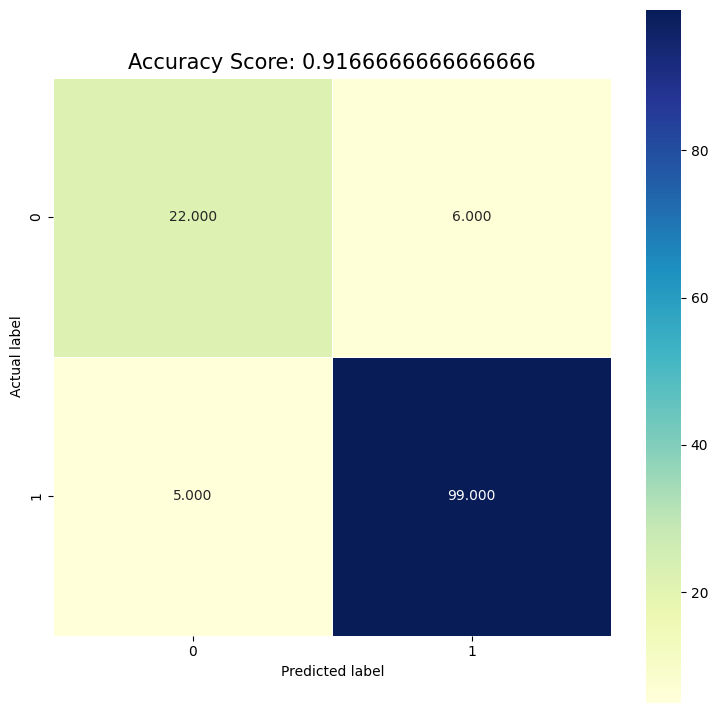

In [237]:
# Predict Output
cm = metrics.confusion_matrix(y_test, knn.predict(X_test))
score = knn.score(X_test, y_test)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [238]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

  Above Mean       0.81      0.79      0.80        28
  Below Mean       0.94      0.95      0.95       104

    accuracy                           0.92       132
   macro avg       0.88      0.87      0.87       132
weighted avg       0.92      0.92      0.92       132



In [239]:
#Using Cross Validation to Get the Best Value of k
k_values = [i for i in range(1, 10)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))


Text(0, 0.5, 'Accuracy Score')

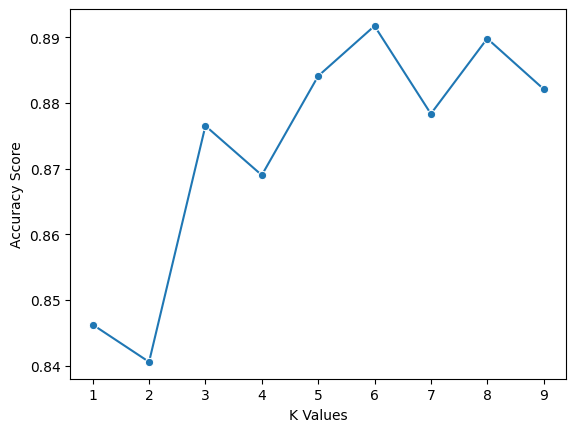

In [240]:
sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [241]:
#Refitting and Evaluating the Model with k = 6 
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [242]:
y_pred = knn.predict(X_test)

In [243]:
print(y_train.unique())

['B' 'A']


Text(0.5, 1.0, 'Accuracy Score: 0.9318181818181818')

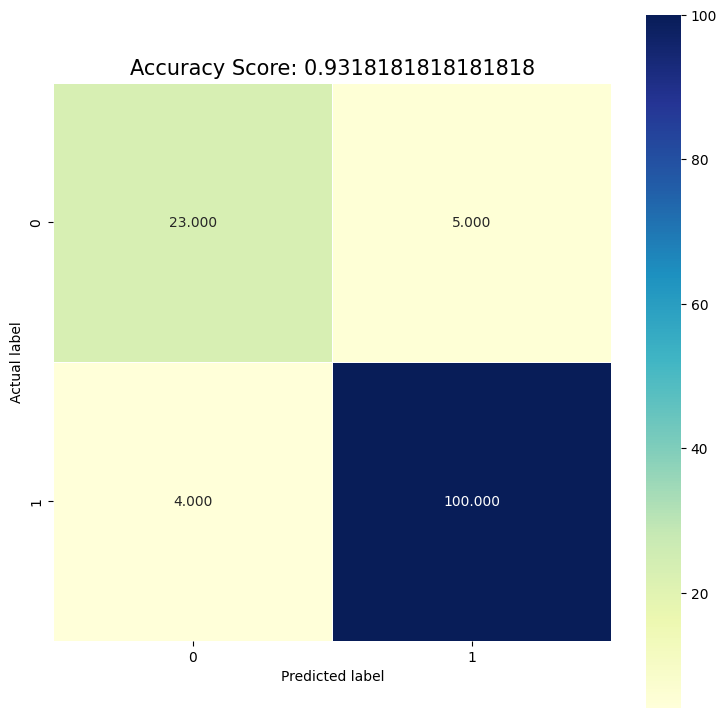

In [244]:
# Predict Output
cm = metrics.confusion_matrix(y_test, knn.predict(X_test))
score = knn.score(X_test, y_test)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [ ]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))

#Improved Accuracy

              precision    recall  f1-score   support

  Above Mean       0.85      0.82      0.84        28
  Below Mean       0.95      0.96      0.96       104

    accuracy                           0.93       132
   macro avg       0.90      0.89      0.90       132
weighted avg       0.93      0.93      0.93       132



In [248]:
# Create a Gaussian Classifier
naivebayes = GaussianNB()

# Train the model using the training sets
naivebayes.fit(x, y)

# Train the model using the training sets
naivebayes.fit(X_train, y_train)


GaussianNB()

In [249]:
y_pred = naivebayes.predict(X_test)

In [250]:
print(y_train.unique())

['B' 'A']


Text(0.5, 1.0, 'Accuracy Score: 0.8409090909090909')

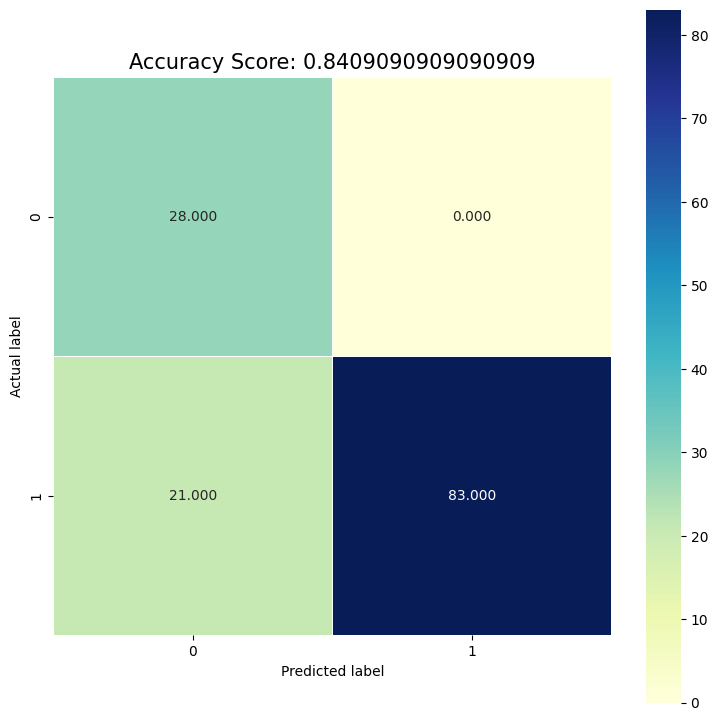

In [251]:
# Predict Output
cm = metrics.confusion_matrix(y_test, naivebayes.predict(X_test))
score = naivebayes.score(X_test, y_test)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

In [ ]:
target_names = ['Above Mean', 'Below Mean']
print(classification_report(y_test, y_pred, target_names = target_names))
#Worst accuracy in comparison to logistic regression and KNN

              precision    recall  f1-score   support

  Above Mean       0.57      1.00      0.73        28
  Below Mean       1.00      0.80      0.89       104

    accuracy                           0.84       132
   macro avg       0.79      0.90      0.81       132
weighted avg       0.91      0.84      0.85       132



In [ ]:
# This assignment can be improved dramatically, which I'll do and post on GitHub. However, for the sake of the assignment (and the deadline), I guess this is adequate.